<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Determining the Shape of the Hydrogen Molecule Ion
## Examples - Quantum Mechanics
<section class="post-meta">
By Henning G. Hugdal, Magnus H-S Dahle, Håkon W. Ånes and Peter Berg
</section>
Last edited: January 19th 2019
___

The aim of this example is to determine the "shape of highest probability" for the hydrogen molecule ion. For a given volume, the task is to use Monte Carlo integration to find the ratio between the semi-principal axes of an ellipsoid, such that the probability of finding the electron inside the ellipsoid is maximised. If you are unfamiliar with Monte Carlo integration, take a look at the short introduction given in this [notebook](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/ex_qm3_the_size_of_a_hydrogen_atom_monte_carlo_integration.ipynb).

We are interested in determining the shape of the hydrogen molecule ion, that is one electron bound to two protons. The Hamiltonian for this system is
    $$H = -\frac{\hbar^2}{2m}\nabla^2 - \frac{e^2}{4 \pi \epsilon_o}\left(\frac{1}{r_1}+\frac{1}{r_2}\right). $$
Using the 1s wave function $\psi_{100}$ for hydrogen as a basis, we suggest the trial function
$$ \psi = A[\psi_{100}(r_1)+\psi_{100}(r_2)].$$
The normalization constant is (see e.g. Griffiths p. 306 [[1]](#rsc))
$$ A = \sqrt{\frac{1}{2(1+I)}}$$
with 
$$ I = \exp(-R/a)\left[1+\frac{R}{a}+\frac{1}{3}\left(\frac{R}{a}\right)^2\right],$$
where $R$ is the distance between the protons. As calculated on page 308 in Griffiths [[1]](#rsc), the distance which minimizes the energy is $R=2.4a$, where $a= 0.529$ Å is the Bohr radius. However, in order to avoid rounding errors, we will set $a=1$ in the following.

We assume azimutal symmetry, i.e. no $\phi$-dependence, such that the semi-principal axes in two directions, say the $x$- and $y$-directions, are equal. Then the two protons are placed on the $z$-axis, e.g. at $\pm R/2 \hat{z}$. For a given volume of the ellipsoid,
$$V_0 = \frac{4}{3}\pi(2a)^3,$$
we want to find the ratio between the semi-principal axes $b$ and $c$ of the ellipsoid which maximizes the probability of the electron to be found inside the ellipsoid.

We will also need that the surface of an ellipsoid is described by
$$ \frac{x^2}{b^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2} = 1$$
and that the volume is given by
$$ V = \frac{4}{3}\pi b^2 c.$$

Now we're good to go!

In [16]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.collections as collections

# Set common figure parameters:
newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 200, 
             'lines.linewidth': 1.0, 'figure.figsize': (2, 2),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 10, 'legend.frameon': False, 
             'legend.handlelength': 1.5, 'figure.dpi': 150}
plt.rcParams.update(newparams)

First of all we define a function `psi(r1,r2,R)` which returns the value of the wave funtion for given distances $r_1$ and $r_2$ to the two protons, and the distance $R$ between the protons.

In [4]:
def psi(r1, r2, R): 
    """Wavefunction for an electron in a potential from two protons.
    Input:
        r1     Distance to proton 1
        r2     Distance to proton 2
        R      Distance between protons"""
    a = 1 # Bohr radius (set to one)
    I = np.exp(-R/a)*(1+R/a+1/3*(R/a)**2)
    A = np.sqrt(1/(2*(1+I)))
    return A/np.sqrt(np.pi*a**3)*(np.exp(-r1/a)+np.exp(-r2/a))

Next we define the number of random points, $N$, and use the general prosedure described [here](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/ex_qm3_the_size_of_a_hydrogen_atom_monte_carlo_integration.ipynb) to calculate the probability inside an ellipsoid with semi-principal axes $b$ and $c$. Since the volume of the ellipsoid should be equal to the volume $V_0$, $c$ is determined from a chosen value of $b$.

In [5]:
N = 1.0e5 # Number of random numbers
a = 1     # Bohr radius (set to one)
R = 2.4*a # From Griffiths p. 308
i = 0
n = 0
V_0 = (4/3)*np.pi*(2*a)**3  # Given volume

In the following code, we find the value of $b$ which maximizes the probability. $2a$ is chosen as an upper bound, since it seems reasonable that the ellipsoid should be stretched in the $z$-direction, meaning $b<c$ and hence $b<2a$, which corresponds to a sphere with the given volume $V_0$.

In [6]:
"""The following code calculates the value of b which maximizes the probability inside the ellipsoid.
This is however not a very efficient solution."""

b_min = 1*a  # Lower limit for b
b_max = 2*a  # Upper limit for b, corresponds to sphere
b_steps = 6  # Number of steps between b_min and b_max
b_ = np.linspace(b_min, b_max, b_steps)  # Array of b-values, the lenght of semi-principal axis 
                                         # in the x- and y-direction.
acc = 0.0001*a  # Wanted accuracy
prob = np.zeros(b_steps)
while (b_max-b_min) > acc:
    for j, b in enumerate(b_):
        c = V_0*3/(4*np.pi*b**2)   # Length of semi-principal axis in z-direction, calculated from V_0 and b
        while i < N:
            x = random.uniform(-b, b)
            y = random.uniform(-b, b)
            z = random.uniform(-c, c)
            check = (x/b)**2+(y/b)**2+(z/c)**2 # Used to check if point is inside ellipsoid
            r1 = np.sqrt(x**2 + y**2 + (z-R/2)**2)
            r2 = np.sqrt(x**2 + y**2 + (z+R/2)**2)
            if check<=1:
                n = n + abs(psi(r1, r2, R))**2
            i = i + 1
        prob[j] = n/N*8*b**2*c
        n = 0
        i = 0
    b_max = b_[max(prob)==prob][0] + (b_max-b_min)/b_steps
    b_min = b_[max(prob)==prob][0] - (b_max-b_min)/b_steps
    b_ = np.linspace(b_min, b_max, b_steps)
    
prob_max = max(prob)
b = b_[prob_max==prob][0]  
c = V_0*3/(4*np.pi*b**2)
print("Maximum probability is: %s" % prob_max)
print("b/a = %s" % (b/a))
print("c/a = %s" % (c/a))
print("The ratio b/c is: %s" % (b/c))

Maximum probability is: 0.658615309675
b/a = 1.63442609867
c/a = 2.99474197578
The ratio b/c is: 0.54576524852


The value for the ratio $b/c$ which gives the highest probabiliy is approximately 0.6, which means that the ellipsoid is quite a bit stretched out along the $z$-axis. As an illustration of if this seems reasonable, the probability density in the $xz$-plane is plotted below, together with the ellipse with the $c/b$ ratio found above. 

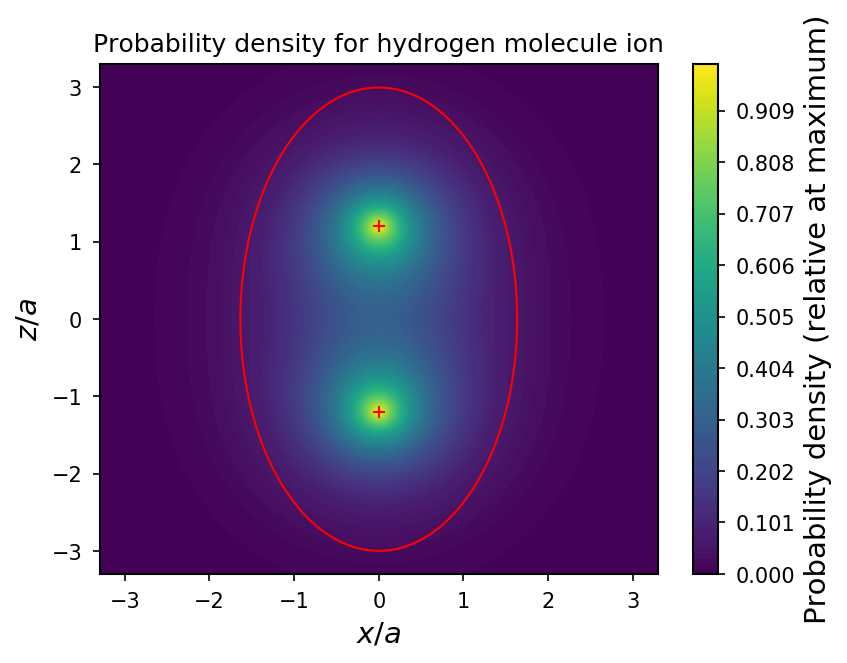

In [17]:
p = 1000
xs = np.linspace(-1.1*c, 1.1*c, p, True)
X,Z = np.meshgrid(xs, xs)
psi2 = np.zeros([p, p])

r1 = np.sqrt(X**2+(Z-R/2)**2)
r2 = np.sqrt(X**2+(Z+R/2)**2)

psi2 = abs(psi(r1, r2, R))**2

plt.figure(figsize=(6,4.5))
levels = np.linspace(0, 1, 100, True)
C = plt.contourf(X/a, Z/a, psi2/psi(0,R,R)**2, levels)
plt.title('Probability density for hydrogen molecule ion')
plt.ylabel(r'$z/a$')
plt.xlabel(r'$x/a$')
cbar = plt.colorbar(C)
cbar.ax.set_ylabel('Probability density (relative at maximum)')


x = lambda v: b/a*np.cos(v)
z = lambda v: c/a*np.sin(v)
theta = np.linspace(0, 2*np.pi, 1000)
p1, = plt.plot(x(theta), z(theta), 'r')
p2, = plt.plot([0,0], [-R/a/2,R/a/2], 'r+')

As we see, the determined ratio seems quite reasonable! To check the obtained result, it is also interesting to integrate the probability density numerically using a built in function from `scipy.integrate`. This is done below, using the functions `dblquad` and `tplquad`, which lets you integrate in two and three dimensions respectively. The two dimensional integral function can be used since we have azimutal symmetry, which means that the integration over $\phi$ only contributes a factor $2\pi$. This is also definitely the most efficient code to run.

In [19]:
from scipy.integrate import dblquad # Two dimensional integral function

def f2D(r, theta):
    a = 1.0 # Bohr radius (set to one)
    I = np.exp(-R/a)*(1+R/a+1/3*(R/a)**2)
    A = np.sqrt(1/(2*(1+I)))
    f = (A/np.sqrt(np.pi*a**3)*(np.exp(-np.sqrt(r**2+R**2/4-R*r*np.cos(theta))/a)\
        +np.exp(-np.sqrt(r**2+R**2/4+R*r*np.cos(theta))/a)))**2*r**2*np.sin(theta)
    return f

#Integration limits
r1 = 0
r2 = lambda theta: b*c/np.sqrt(c**2*np.sin(theta)**2+b**2*np.cos(theta)**2)

t1 = 0
t2 = np.pi

I = 2*np.pi*dblquad(f2D, t1, t2, lambda theta: r1, lambda theta: r2(theta))[0]
print("The probability is: %s" % I)

The probability is: 0.6545479922964303


In [20]:
from scipy.integrate import tplquad  # Three dimensional integral function

def f3D(phi, r, theta):
    a = 1.0 # Bohr radius (set to one)
    I = np.exp(-R/a)*(1+R/a+1/3*(R/a)**2)
    A = np.sqrt(1/(2*(1+I)))
    f = (A/np.sqrt(np.pi*a**3)*(np.exp(-np.sqrt(r**2+R**2/4-R*r*np.cos(theta))/a)+\
        np.exp(-np.sqrt(r**2+R**2/4+R*r*np.cos(theta))/a)))**2*r**2*np.sin(theta)
    return f

#Integration limits
r1 = 0
r2 = lambda theta: b*c/np.sqrt(c**2*np.sin(theta)**2+b**2*np.cos(theta)**2)

t1 = 0
t2 = np.pi

p1 = 0
p2 = 2*np.pi

I = tplquad(f3D,t1,t2,lambda theta: r1, lambda theta: r2(theta),lambda theta,r: p1, lambda theta,r: p2)[0]
print("The probability is: %s" % I)

The probability is: 0.6545479922883506


We see that the result we got using Monte Carlo integration is in quite good correspondence with the results obtained using the build in functions.

As a test of our previous results, we can also try to find the optimal solution using the function `optimize.minimize` from the `scipy` library. We here use the two-dimensional integration method, since this was the most efficient one.

In [21]:
from scipy.optimize import minimize

def obj_func(b, V):
    """Objective function which returns the probability for a given value of the semi-principal axis b"""
    B = b*a
    C = V*3/(4*np.pi*B**2)
    r1 = 0
    r2 = lambda theta: B*C/np.sqrt(C**2*np.sin(theta)**2+B**2*np.cos(theta)**2)

    t1 = 0
    t2 = np.pi

    I = 2*np.pi*dblquad(f2D, t1, t2, lambda theta: r1, lambda theta: r2(theta))[0]
    return -I

def optimizeRatio(V, tol):
    b_0 = 0.01
    res = minimize(fun=obj_func, x0=b_0, args=(V,), jac=False, tol=tol)
    ratio = res.x[0]*a/(V*3/(4*np.pi*res.x[0]**2)/a**2)
    
    return (ratio, res)

rat, res = optimizeRatio(V_0, 1e-5)

print(res.message)
print("b/a = %s" % res.x[0])
print("Maximum probability = %s" % res.fun*(-1))
print("Ratio b/c = %s" % rat)

Optimization terminated successfully.
b/a = 1.7091338453

Ratio b/c = 0.624077084894


As we see, the results agree quite well with what we have found earlier.
___

An interesting next question is: How does the ratio $b/c$ change as the volume $V_0$ of the ellipsoid changes? Thinking about how the protons are located, one might guess that $b/c$ will decrease for decreasing volumes, i.e. the ellipsoid becomes very narrow in order to contain the two protons. For large volumes, $b/c$ should approach one. Let's check these assumptions. In order to save computing time, we will use the `minimize` function from the `scipy` library, as was done above.

In [22]:
V = np.logspace(-3, 3, 7)
ratios = np.zeros(np.size(V))
results = np.zeros(np.size(V))
# We need higher accuracy when the volume gets larger, in order to find the correct ratio:

for i, V_ in enumerate(V):
    (ratios[i], res) = optimizeRatio(V_, 1e-4)

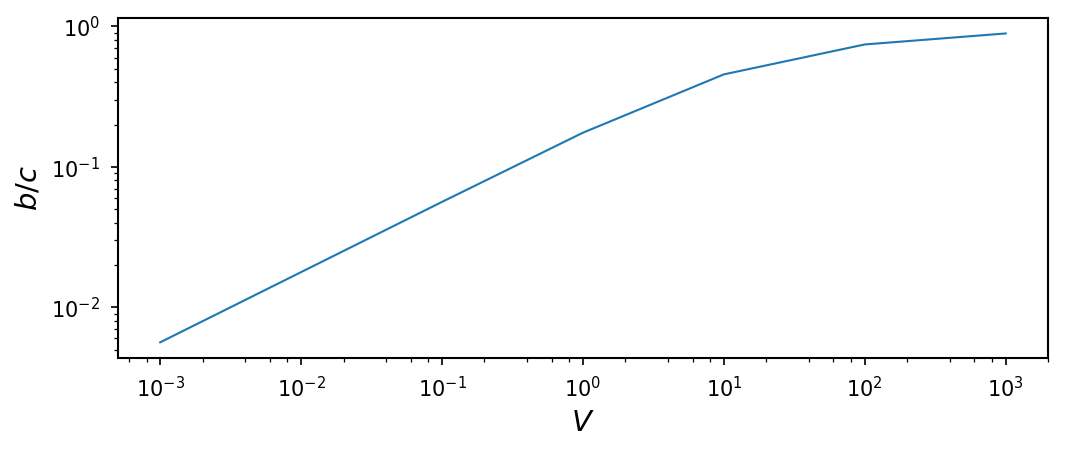

In [23]:
plt.figure(figsize=(8,3))
plt.loglog(V, ratios, '-')
plt.ylabel(r"$b/c$")
plt.xlabel(r"$V$");

We see that our guess seems to fit quite well!

___
<a id="rsc"></a>
## References

<a>[1]</a> Griffiths, D. J. _Introduction to Quantum Mechanics_. Pearson Education, 2004.